# 8-1. 앙상블(Ensemble)
- 여러가지 클래스(모델)를 가져와서 섞어서 사용
- 일반화와 강건성을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
    - 평균 방법
        - 여러 개의 추정값을 독립적으로 구한 뒤 평균을 취함
        - 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
    - 부스팅 방법
        - 순차적으로 모델 생성
        - 결합된 모델의 편항을 감소시키기 위해 노력
        - 여러 개의 약한 모델들을 결합해서 하나의 강력한 앙상블 모델을 구축하는 것

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
plt.style.use(["seaborn-whitegrid"])

from sklearn.ensemble import BaggingClassifier, BaggingRegressor, VotingClassifier, VotingRegressor, StackingClassifier, StackingRegressor, RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer, load_diabetes, load_iris, load_wine
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from itertools import product

/var/folders/79/v97_0rqs3p34z9xx6y57xks80000gn/T/ipykernel_1927/4232921401.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(["seaborn-whitegrid"])


In [4]:
# 보스턴 주택 가격 데이터 불러오기
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
boston_target = raw_df.values[1::2, 2]
boston_feature_names = ["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "b", "lstat", "medv"]

boston_df = pd.DataFrame(boston_data)
boston_df["Target"] = boston_target
X, y = boston_data, boston_target

## Bagging meta-estimator
- 1개의 모델을 여러 번 쓰는 것(원래 훈련 데이터셋의 일부를 사용해서 여러 모델을 훈련)
- 부트스트랩이라는 방법으로 변형시킨 데이터셋을 많이 만들어서 수행
- 각각의 결과를 결합해서 최종 결과를 생성
- 분산을 줄이고 과적합을 막음
- 강력하고 복잡한 모델에서 잘 동작

### 분류 - Classifier

#### KNN

##### 붓꽃 데이터

In [5]:
# 붓꽃 데이터 불러오기
iris = load_iris()

# KNN 모델
base_model = make_pipeline(StandardScaler(),
                           KNeighborsClassifier())

# BaggingClassifier
bagging_model = BaggingClassifier(estimator=base_model,
                                  n_estimators=10,
                                  max_samples=0.5, max_features=0.5,
                                  random_state=1)

- 교차검증 수행

In [6]:
# 교차검증 수행(KNN)
score = cross_validate(estimator=base_model,
                       X=iris.data, y=iris.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.0012855052947998047 (+/- 0.00024302867338771807)
avg score time: 0.0015031814575195313 (+/- 9.929318354486102e-05)
avg test score: 0.96 (+/- 0.024944382578492935)


In [7]:
# 교차검증 수행(Bagging)
score = cross_validate(estimator=bagging_model,
                       X=iris.data, y=iris.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.011961030960083007 (+/- 0.0005233117255036289)
avg score time: 0.003918695449829102 (+/- 0.0002911977960823018)
avg test score: 0.9399999999999998 (+/- 0.038873012632301994)


##### 와인 데이터

In [8]:
# 와인 데이터 불러오기
wine = load_wine()

# KNN 모델
base_model = make_pipeline(StandardScaler(),
                           KNeighborsClassifier())

# BaggingClassifier
bagging_model = BaggingClassifier(estimator=base_model,
                                  n_estimators=10,
                                  max_samples=0.5, max_features=0.5,
                                  random_state=1)

- 교차검증 수행

In [9]:
# 교차검증 수행(KNN)
score = cross_validate(estimator=base_model,
                       X=wine.data, y=wine.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.0009326457977294922 (+/- 0.00021739446895352286)
avg score time: 0.0014896392822265625 (+/- 0.00014049576185193609)
avg test score: 0.9493650793650794 (+/- 0.037910929811115976)


In [10]:
# 교차검증 수행(Bagging)
score = cross_validate(estimator=bagging_model,
                       X=wine.data, y=wine.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.012250804901123047 (+/- 0.0004999121879024687)
avg score time: 0.0037747859954833985 (+/- 0.00019551908614864148)
avg test score: 0.9552380952380952 (+/- 0.028459215269161207)


#### SVC

##### 붓꽃 데이터

In [11]:
# 붓꽃 데이터 불러오기
iris = load_iris()

# SVC 모델
base_model = make_pipeline(StandardScaler(),
                           SVC())

# BaggingClassifier
bagging_model = BaggingClassifier(estimator=base_model,
                                  n_estimators=10,
                                  max_samples=0.5, max_features=0.5,
                                  random_state=1)

- 교차검증 수행

In [12]:
# 교차검증 수행(SVC)
score = cross_validate(estimator=base_model,
                       X=iris.data, y=iris.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.0013068199157714843 (+/- 0.0003435807914082604)
avg score time: 0.0005419731140136718 (+/- 8.723427925296191e-05)
avg test score: 0.9666666666666666 (+/- 0.02108185106778919)


In [13]:
# 교차검증 수행(Bagging)
score = cross_validate(estimator=bagging_model,
                       X=iris.data, y=iris.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.016867303848266603 (+/- 0.000523988423160329)
avg score time: 0.002729368209838867 (+/- 0.00011435231116434702)
avg test score: 0.9466666666666665 (+/- 0.03399346342395189)


##### 와인 데이터

In [14]:
# 와인 데이터 불러오기
wine = load_wine()

# SVC 모델
base_model = make_pipeline(StandardScaler(),
                           SVC())

# BaggingClassifier
bagging_model = BaggingClassifier(estimator=base_model,
                                  n_estimators=10,
                                  max_samples=0.5, max_features=0.5,
                                  random_state=1)

- 교차검증 수행

In [15]:
# 교차검증 수행(SVC)
score = cross_validate(estimator=base_model,
                       X=wine.data, y=wine.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.0014326095581054688 (+/- 0.0004332665169413074)
avg score time: 0.0006157398223876953 (+/- 0.0001245159238743331)
avg test score: 0.9833333333333334 (+/- 0.022222222222222233)


In [16]:
# 교차검증 수행(Bagging)
score = cross_validate(estimator=bagging_model,
                       X=wine.data, y=wine.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.018431472778320312 (+/- 0.001046088465862402)
avg score time: 0.003523731231689453 (+/- 0.000184747269392331)
avg test score: 0.9722222222222221 (+/- 0.024845199749997673)


#### Decision Tree

##### 붓꽃 데이터

In [17]:
# 붓꽃 데이터 불러오기
iris = load_iris()

# 의사결정나무 모델
base_model = make_pipeline(StandardScaler(),
                           DecisionTreeClassifier(random_state=1))

# BaggingClassifier
bagging_model = BaggingClassifier(estimator=base_model,
                                  n_estimators=10,
                                  max_samples=0.5, max_features=0.5,
                                  random_state=1)

- 교차검증 수행

In [18]:
# 교차검증 수행(의사결정나무)
score = cross_validate(estimator=base_model,
                       X=iris.data, y=iris.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.0011803150177001954 (+/- 0.00040123605977234947)
avg score time: 0.00034971237182617186 (+/- 6.867537810473459e-05)
avg test score: 0.9666666666666668 (+/- 0.036514837167011066)


In [19]:
# 교차검증 수행(Bagging)
score = cross_validate(estimator=bagging_model,
                       X=iris.data, y=iris.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.014522266387939454 (+/- 0.0007886911303378871)
avg score time: 0.0014509201049804688 (+/- 0.00010369334654558637)
avg test score: 0.9399999999999998 (+/- 0.038873012632301994)


##### 와인 데이터

In [20]:
# 와인 데이터 불러오기
wine = load_wine()

# 의사결정나무 모델
base_model = make_pipeline(StandardScaler(),
                           DecisionTreeClassifier(random_state=1))

# BaggingClassifier
bagging_model = BaggingClassifier(estimator=base_model,
                                  n_estimators=10,
                                  max_samples=0.5, max_features=0.5,
                                  random_state=1)

- 교차검증 수행

In [21]:
# 교차검증 수행(의사결정나무)
score = cross_validate(estimator=base_model,
                       X=wine.data, y=wine.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.0013303756713867188 (+/- 0.00029515114641826993)
avg score time: 0.00033402442932128906 (+/- 7.193385264440448e-05)
avg test score: 0.8876190476190476 (+/- 0.04989432016453655)


In [22]:
# 교차검증 수행(Bagging)
score = cross_validate(estimator=bagging_model,
                       X=wine.data, y=wine.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.01522984504699707 (+/- 0.0007204658782523965)
avg score time: 0.0014976024627685546 (+/- 0.0001198092241747564)
avg test score: 0.9328571428571429 (+/- 0.045319058710309834)


### 회귀 - Regressor

#### KNN

##### 보스턴 주택 가격

In [23]:
# KNN 모델
base_model = make_pipeline(StandardScaler(),
                           KNeighborsRegressor())

# BaggingRegressor
bagging_model = BaggingRegressor(estimator=base_model,
                                 n_estimators=10,
                                 max_samples=0.5, max_features=0.5,
                                 random_state=1)

- 교차검증 수행

In [24]:
# 교차검증 수행(KNN)
score = cross_validate(estimator=base_model,
                       X=boston_data, y=boston_target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.0009041786193847656 (+/- 0.00015119412273430837)
avg score time: 0.0010094165802001954 (+/- 0.0002284118874293515)
avg test score: 0.47357748833823543 (+/- 0.13243123464477455)


In [25]:
# 교차검증 수행(Bagging)
score = cross_validate(estimator=bagging_model,
                       X=boston_data, y=boston_target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.011212825775146484 (+/- 0.0004989072011968091)
avg score time: 0.0048198699951171875 (+/- 0.00021251573487041168)
avg test score: 0.46891971085227657 (+/- 0.11968742977567538)


##### 당뇨병 데이터

In [26]:
# 당뇨병 데이터 불러오기
diabetes = load_diabetes()

# KNN 모델
base_model = make_pipeline(StandardScaler(),
                           KNeighborsRegressor())

# BaggingRegressor
bagging_model = BaggingRegressor(estimator=base_model,
                                 n_estimators=10,
                                 max_samples=0.5, max_features=0.5,
                                 random_state=1)

- 교차검증 수행

In [27]:
# 교차검증 수행(KNN)
score = cross_validate(estimator=base_model,
                       X=diabetes.data, y=diabetes.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.0009447097778320313 (+/- 0.00016940988792990045)
avg score time: 0.001012277603149414 (+/- 0.00011723857812041079)
avg test score: 0.3689720650295623 (+/- 0.044659049060165365)


In [28]:
# 교차검증 수행(Bagging)
score = cross_validate(estimator=bagging_model,
                       X=diabetes.data, y=diabetes.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.011037588119506836 (+/- 0.00028283177099925293)
avg score time: 0.004953193664550781 (+/- 0.0006234587473988138)
avg test score: 0.3316003873049397 (+/- 0.05869136936517281)


#### SVR

##### 보스턴 주택 가격

In [29]:
# SVR 모델
base_model = make_pipeline(StandardScaler(),
                           SVR())

# BaggingRegressor
bagging_model = BaggingRegressor(estimator=base_model,
                                 n_estimators=10,
                                 max_samples=0.5, max_features=0.5,
                                 random_state=1)

- 교차검증 수행

In [30]:
# 교차검증 수행(SVR)
score = cross_validate(estimator=base_model,
                       X=boston_data, y=boston_target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.0074460506439208984 (+/- 0.00012059908394621699)
avg score time: 0.004567527770996093 (+/- 0.0002212227706910073)
avg test score: 0.17631266230186618 (+/- 0.5224914915128981)


In [31]:
# 교차검증 수행(Bagging)
score = cross_validate(estimator=bagging_model,
                       X=boston_data, y=boston_target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.028237581253051758 (+/- 0.0010379100515113952)
avg score time: 0.021089792251586914 (+/- 0.0007918057688137844)
avg test score: 0.1336105933705471 (+/- 0.32547056958342896)


##### 당뇨병 데이터

In [32]:
# 당뇨병 데이터 불러오기
diabetes = load_diabetes()

# SVR 모델
base_model = make_pipeline(StandardScaler(),
                           SVR())

# BaggingRegressor
bagging_model = BaggingRegressor(estimator=base_model,
                                 n_estimators=10,
                                 max_samples=0.5, max_features=0.5,
                                 random_state=1)

- 교차검증 수행

In [33]:
# 교차검증 수행(SVR)
score = cross_validate(estimator=base_model,
                       X=diabetes.data, y=diabetes.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.005423069000244141 (+/- 0.00012745162389776626)
avg score time: 0.0035509109497070313 (+/- 0.0001627350004413453)
avg test score: 0.14659868748701582 (+/- 0.02190883171995428)


In [34]:
# 교차검증 수행(Bagging)
score = cross_validate(estimator=bagging_model,
                       X=diabetes.data, y=diabetes.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.023388242721557616 (+/- 0.0016270109911188468)
avg score time: 0.01706094741821289 (+/- 0.0007068731947548554)
avg test score: 0.04692213518163468 (+/- 0.022294453549402307)


#### Decision Tree

##### 보스턴 주택 가격

In [35]:
# 의사결정나무 모델
base_model = make_pipeline(StandardScaler(),
                           DecisionTreeRegressor(random_state=1))

# BaggingRegressor
bagging_model = BaggingRegressor(estimator=base_model,
                                 n_estimators=10,
                                 max_samples=0.5, max_features=0.5,
                                 random_state=1)

- 교차검증 수행

In [36]:
# 교차검증 수행(의사결정나무)
score = cross_validate(estimator=base_model,
                       X=boston_data, y=boston_target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.003713560104370117 (+/- 0.0002546570886013496)
avg score time: 0.0003787994384765625 (+/- 5.1634529155321286e-05)
avg test score: 0.16208814436406555 (+/- 0.8253949015680753)


In [37]:
# 교차검증 수행(Bagging)
score = cross_validate(estimator=bagging_model,
                       X=boston_data, y=boston_target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.01997404098510742 (+/- 0.0013431967195472391)
avg score time: 0.0014235496520996094 (+/- 9.039585011360301e-05)
avg test score: 0.5135609191078169 (+/- 0.2617888046453568)


##### 당뇨병 데이터

In [38]:
# 당뇨병 데이터 불러오기
diabetes = load_diabetes()

# 의사결정나무 모델
base_model = make_pipeline(StandardScaler(),
                           DecisionTreeRegressor(random_state=1))

# BaggingRegressor
bagging_model = BaggingRegressor(estimator=base_model,
                                 n_estimators=10,
                                 max_samples=0.5, max_features=0.5,
                                 random_state=1)

- 교차검증 수행

In [39]:
# 교차검증 수행(의사결정나무)
score = cross_validate(estimator=base_model,
                       X=diabetes.data, y=diabetes.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.002976846694946289 (+/- 0.00028360374133069144)
avg score time: 0.0005094051361083984 (+/- 0.00015744240165946826)
avg test score: -0.13934917367477434 (+/- 0.1300593982494904)


In [40]:
# 교차검증 수행(Bagging)
score = cross_validate(estimator=bagging_model,
                       X=diabetes.data, y=diabetes.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.018143320083618165 (+/- 0.0008018592189388442)
avg score time: 0.0014628887176513672 (+/- 0.00026975442974296385)
avg test score: 0.29880265533565964 (+/- 0.09522889242492111)


## Forest of randomized trees
- 무작위 결정 트리를 기반으로 하는 두 개의 평균화 모델이 존재
    - Random Forest
    - Extra-Trees
- 모델 구성에 임의성을 추가해서 다양한 모델 집합이 생성
- 앙상블 모델의 예측은 각 모델의 평균

### Random Forests

#### 분류 - Classifier

##### 붓꽃 데이터

In [41]:
# 붓꽃 데이터 불러오기
iris = load_iris()

# RandomForestClassifier
model = make_pipeline(StandardScaler(),
                      RandomForestClassifier(random_state=1))

- 교차검증 수행

In [42]:
# 교차검증 수행
score = cross_validate(estimator=model,
                       X=iris.data, y=iris.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.08030543327331544 (+/- 0.0017032935034471692)
avg score time: 0.004800605773925781 (+/- 0.00019078995385888404)
avg test score: 0.9666666666666668 (+/- 0.02108185106778919)


##### 와인 데이터

In [43]:
# 와인 데이터 불러오기
wine = load_wine()

# RandomForestClassifier
model = make_pipeline(StandardScaler(),
                      RandomForestClassifier(random_state=1))

- 교차검증 수행

In [44]:
# 교차검증 수행
score = cross_validate(estimator=model,
                       X=wine.data, y=wine.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.08317303657531738 (+/- 0.0024418305050761062)
avg score time: 0.005033445358276367 (+/- 0.0001643287253407777)
avg test score: 0.9777777777777779 (+/- 0.02721655269759088)


#### 회귀 - Regressor

##### 보스턴 주택 가격

In [45]:
# RandomForestRegressor
model = make_pipeline(StandardScaler(),
                      RandomForestRegressor(random_state=1))

- 교차검증 수행

In [46]:
# 교차검증 수행
score = cross_validate(estimator=model,
                       X=boston_data, y=boston_target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.2152942180633545 (+/- 0.003327280114691019)
avg score time: 0.004746770858764649 (+/- 0.00014249730981205608)
avg test score: 0.6198776228288864 (+/- 0.21480891133903474)


##### 당뇨병 데이터

In [47]:
# 당뇨병 데이터 불러오기
diabetes = load_diabetes()

# RandomForestRegressor
model = make_pipeline(StandardScaler(),
                      RandomForestRegressor(random_state=1))

- 교차검증 수행

In [48]:
# 교차검증 수행
score = cross_validate(estimator=model,
                       X=diabetes.data, y=diabetes.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.17579360008239747 (+/- 0.0019349477821941955)
avg score time: 0.0047553062438964845 (+/- 0.00025047849702327946)
avg test score: 0.42390686138371086 (+/- 0.050357656045017594)


### Extemely Randomized Trees

#### 분류 - Classifier

##### 붓꽃 데이터

In [49]:
# 붓꽃 데이터 불러오기
iris = load_iris()

# ExtraTreesClassifier
model = make_pipeline(StandardScaler(),
                      ExtraTreesClassifier(random_state=1))

- 교차검증 수행

In [50]:
# 교차검증 수행
score = cross_validate(estimator=model,
                       X=iris.data, y=iris.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.05910935401916504 (+/- 0.0014018676601331426)
avg score time: 0.004793787002563476 (+/- 0.0003784401095454288)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


##### 와인 데이터

In [51]:
# 와인 데이터 불러오기
wine = load_wine()

# ExtraTreesClassifier
model = make_pipeline(StandardScaler(),
                      ExtraTreesClassifier(random_state=1))

- 교차검증 수행

In [52]:
# 교차검증 수행
score = cross_validate(estimator=model,
                       X=wine.data, y=wine.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.06104235649108887 (+/- 0.0019347915947497219)
avg score time: 0.00496821403503418 (+/- 0.00022266520607131378)
avg test score: 0.9833333333333332 (+/- 0.022222222222222233)


#### 회귀 - Regressor

##### 보스턴 주택 가격

In [53]:
# ExtraTreesRegressor
model = make_pipeline(StandardScaler(),
                      ExtraTreesRegressor(random_state=1))

- 교차검증 수행

In [54]:
# 교차검증 수행
score = cross_validate(estimator=model,
                       X=boston_data, y=boston_target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.12937679290771484 (+/- 0.00500817458131471)
avg score time: 0.004848623275756836 (+/- 0.00023229500843733084)
avg test score: 0.6204202055625656 (+/- 0.2617471997473922)


##### 당뇨병 데이터

In [55]:
# 당뇨병 데이터 불러오기
diabetes = load_diabetes()

# ExtraTreesRegressor
model = make_pipeline(StandardScaler(),
                      ExtraTreesRegressor(random_state=1))

- 교차검증 수행

In [56]:
# 교차검증 수행
score = cross_validate(estimator=model,
                       X=diabetes.data, y=diabetes.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.11098461151123047 (+/- 0.002566615811316989)
avg score time: 0.004887199401855469 (+/- 0.0002445852340229571)
avg test score: 0.4353129857958633 (+/- 0.034755085560159424)


### Decision Tree, Random Forest, Extra Trees 시각화

In [57]:
# 격자 그리드 형태 데이터들을 생성할 함수
def get_meshgrid(x, y, step):
    xx, yy = np.meshgrid(np.arange(x.min()-1, x.max()+1, step), np.arange(y.min()-1, y.max()+1, step))
    return xx, yy

# 그래프에 각 클래스에 대한 영역을 구분해줄 함수
def get_contourf(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return plt.contourf(xx, yy, Z, **params)

#### 결정경계 시각화

In [58]:
# 모델들
models = [DecisionTreeClassifier(random_state=1,
                                 max_depth=None),
          RandomForestClassifier(random_state=1,
                                 max_depth=None),
          ExtraTreesClassifier(random_state=1,
                               max_depth=None)]

# 격자 그리드 함수 step
step = 0.02

# 투명도
plot_alpha = 0.2

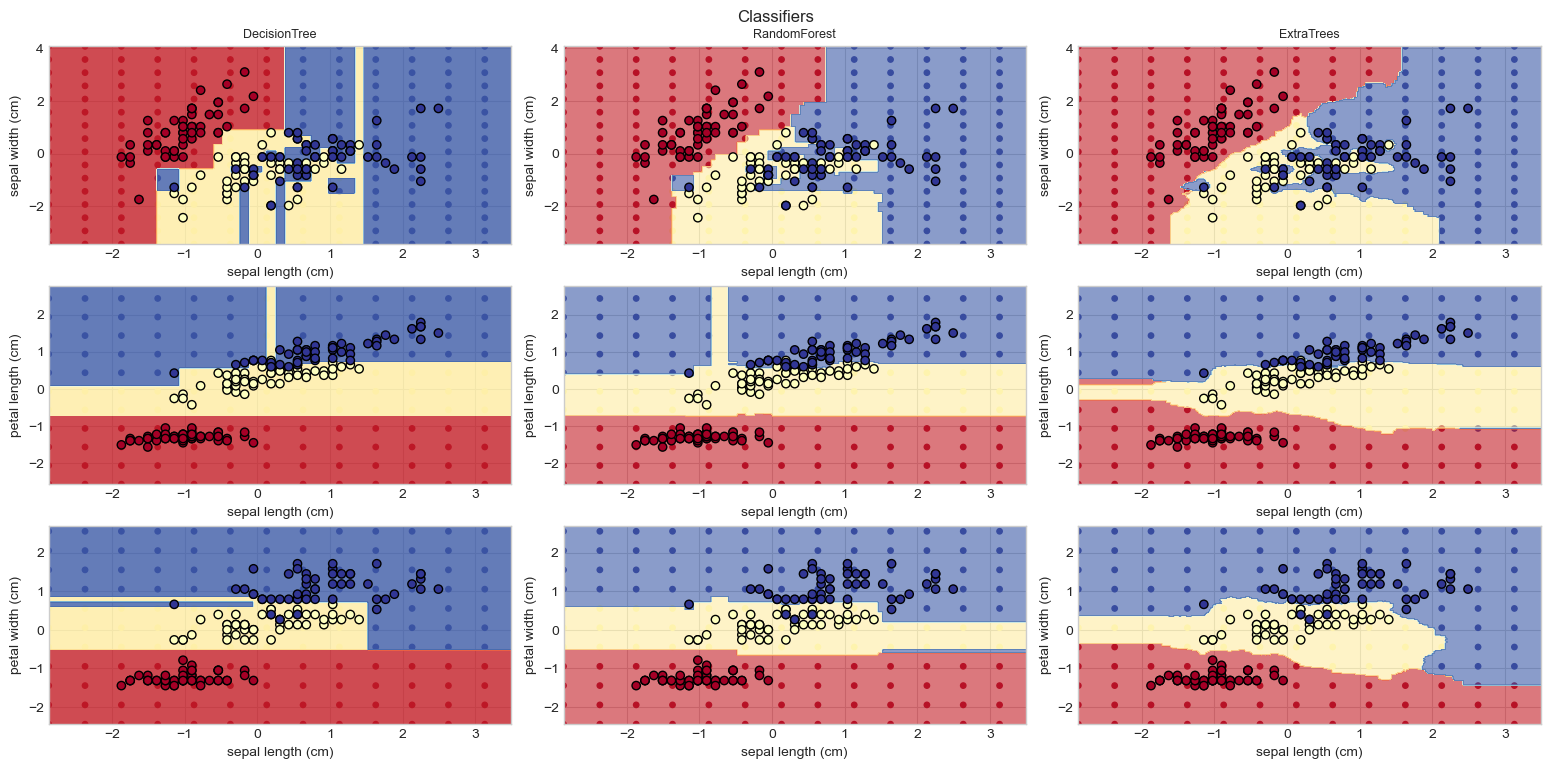

In [59]:
# figure 크기 설정
plt.figure(figsize=(16, 8))

plot_idx = 1
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3]]):
    for model in models:
        # 데이터
        X = iris.data[:, pair]
        y = iris.target

        # 데이터 표준화
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

        # 모델 학습
        model.fit(X, y)

        # subplot 생성
        plt.subplot(3, 3, plot_idx)

        # 각 클래스의 영역을 구분할 데이터들을 생성
        xx, yy = get_meshgrid(X[:, 0], X[:, 1], step)

        # 그리드에 새길 점 데이터 생성
        xx_coarser, yy_coarser = get_meshgrid(X[:, 0], X[:, 1], step=0.5)
        Z_coarser = model.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()])
        Z_coarser = Z_coarser.reshape(xx_coarser.shape)

        # 그리드에 새길 점 생성
        plt.scatter(xx_coarser, yy_coarser, c=Z_coarser, cmap=plt.cm.RdYlBu, s=15)

        # 모델 이름
        model_title = str(model).split("Classifier")[0]

        # 모델 이름 생성
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)

        # 모델별로 비교할 수 있도록 영역을 구분할 데이터들을 분류 및 영역 구분, 분류된 데이터들을 산점도로 시각화
        if isinstance(model, DecisionTreeClassifier):
            get_contourf(model, xx, yy, alpha=0.8, cmap=plt.cm.RdYlBu)
            plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors="k")
        else:
            get_contourf(model, xx, yy, alpha=0.8-plot_alpha, cmap=plt.cm.RdYlBu)
            plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors="k")

        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])
        plt.tight_layout(pad=2.5, w_pad=1.0, h_pad=0.5)

        plot_idx += 1


plt.suptitle("Classifiers", fontsize=12)
plt.axis("tight")
plt.show()

#### 회귀식 시각화

In [60]:
# 모델들
models = [DecisionTreeRegressor(random_state=1,
                                max_depth=None),
          RandomForestRegressor(random_state=1,
                                max_depth=None),
          ExtraTreesRegressor(random_state=1,
                              max_depth=None)]

# 투명도
plot_alpha = 0.2

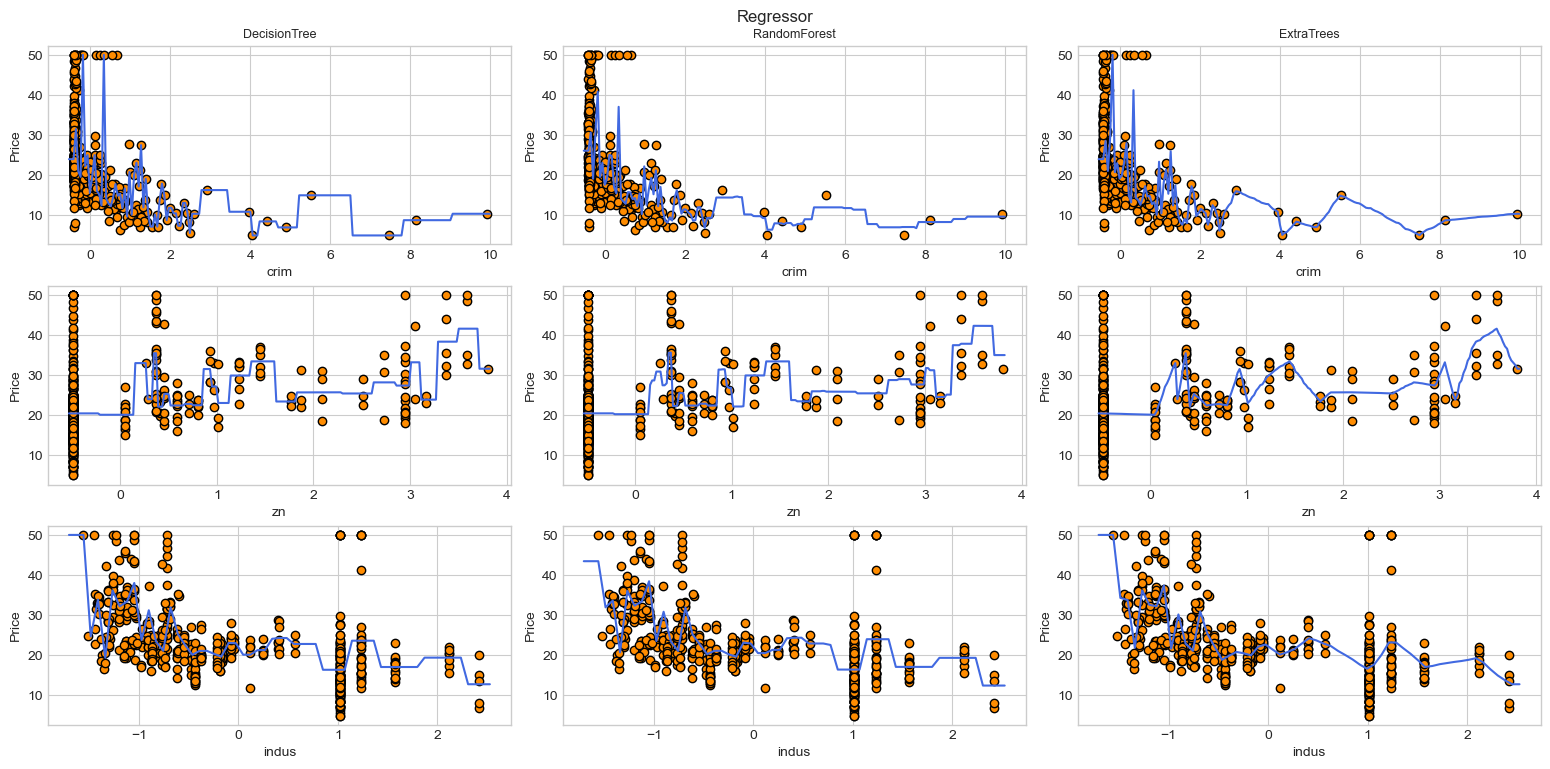

In [61]:
# figure 크기 설정
plt.figure(figsize=(16, 8))

plot_idx = 1
for pair in [0, 1, 2]:
    for model in models:
        # 데이터
        X = boston_data[:, pair].reshape(-1, 1)
        y = boston_target
        X_test = np.array(np.arange(X.min()-1, X.max()+1, 0.5)).reshape(-1, 1)

        # 데이터 표준화
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        X_test = scaler.transform(X_test)

        # 모델 학습 및 예측 데이터 생성
        model.fit(X, y)
        y_predict = model.predict(X_test)

        # subplot 생성
        plt.subplot(3, 3, plot_idx)

        # 모델 이름
        model_title = str(model).split("Regressor")[0]

        # 모델 이름 생성
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)

        # 실제 주택 가격
        if isinstance(model, DecisionTreeRegressor):
            plt.scatter(X, y, color="darkorange", edgecolors="k")
            plt.plot(X_test, y_predict, color="royalblue")
        else:
            plt.scatter(X, y, color="darkorange", edgecolors="k")
            plt.plot(X_test, y_predict, color="royalblue")

        plt.xlabel(boston_feature_names[pair])
        plt.ylabel("Price")
        plt.tight_layout(pad=2.5, w_pad=1.0, h_pad=0.5)
        
        plot_idx += 1
    
plt.suptitle("Regressor", fontsize=12)
plt.axis("tight")
plt.show()

## Boosting
- 점진적으로 약한 모델이 강한 모델로 변화하는 방식
- 학습률(learning rate): 점진적으로 학습해 갈 때 데이터의 오차 or 가중치가 얼마 정도 기여를 하는지 결정
- https://dailyheumsi.tistory.com/115?category=877153#2.3.-%EB%8B%A4%EC%9D%8C%EC%97%90-stump-%EC%97%90-%EC%82%AC%EC%9A%A9%ED%95%A0-dataset-%EB%A7%8C%EB%93%A4%EA%B8%B0 

### AdaBoost
- 일련의 약한 모델들을 학습
- 수정된 버전의 데이터를 반복 학습(가중치가 적용된)
- 가중치 투표(또는 합)를 통해 각 모델의 예측값을 결합
- 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
    - 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
    - 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

#### 분류 - Classifier

##### 붓꽃 데이터

In [62]:
# 붓꽃 데이터 불러오기
iris = load_iris()

# AdaBoostClassifier
model = make_pipeline(StandardScaler(),
                      AdaBoostClassifier(random_state=1))

- 교차검증 수행

In [63]:
# 교차검증 수행
score = cross_validate(estimator=model,
                       X=iris.data, y=iris.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.03936638832092285 (+/- 0.002043685869339817)
avg score time: 0.003975820541381836 (+/- 0.0002533265965599756)
avg test score: 0.9466666666666667 (+/- 0.03399346342395189)


##### 와인 데이터

In [64]:
# 와인 데이터 불러오기
wine = load_wine()

# AdaBoostClassifier
model = make_pipeline(StandardScaler(),
                      AdaBoostClassifier(random_state=1))

- 교차검증 수행

In [65]:
# 교차검증 수행
score = cross_validate(estimator=model,
                       X=wine.data, y=wine.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.04549827575683594 (+/- 0.0030403856290799657)
avg score time: 0.004041290283203125 (+/- 0.00044152596527182906)
avg test score: 0.8028571428571428 (+/- 0.16007729929178363)


#### 회귀 - Regressor

##### 보스턴 주택 가격

In [66]:
# AdaBoostRegressor
model = make_pipeline(StandardScaler(),
                      AdaBoostRegressor(random_state=1))

- 교차검증 수행

In [67]:
# 교차검증 수행
score = cross_validate(estimator=model,
                       X=boston_data, y=boston_target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.054875659942626956 (+/- 0.0019238796866288125)
avg score time: 0.0023349761962890626 (+/- 6.27693409654422e-05)
avg test score: 0.5950402357407681 (+/- 0.2191831697772831)


##### 당뇨병 데이터

In [68]:
# 당뇨병 데이터 불러오기
diabetes = load_diabetes()

# AdaBoostRegressor
model = make_pipeline(StandardScaler(),
                      AdaBoostRegressor(random_state=1))

- 교차검증 수행

In [69]:
# 교차검증 수행
score = cross_validate(estimator=model,
                       X=diabetes.data, y=diabetes.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.04802007675170898 (+/- 0.005475172882050791)
avg score time: 0.002312326431274414 (+/- 0.0001378832669416552)
avg test score: 0.41768138588335957 (+/- 0.03830351043293845)


### Gradient Tree Boosting
- 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
    - 잔여오차를 계속 학습하면서 부스팅
- 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

#### 분류 - Classifier

##### 붓꽃 데이터

In [70]:
# 붓꽃 데이터 불러오기
iris = load_iris()

# GradientBoostingClassifier
model = make_pipeline(StandardScaler(),
                      GradientBoostingClassifier(random_state=1))

- 교차검증 수행

In [71]:
# 교차검증 수행
score = cross_validate(estimator=model,
                       X=iris.data, y=iris.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.13423495292663573 (+/- 0.00677123546338255)
avg score time: 0.0006206035614013672 (+/- 2.940543062672382e-05)
avg test score: 0.9666666666666668 (+/- 0.02108185106778919)


##### 와인 데이터

In [72]:
# 와인 데이터 불러오기
wine = load_wine()

# GradientBoostingClassifier
model = make_pipeline(StandardScaler(),
                      GradientBoostingClassifier(random_state=1))

- 교차검증 수행

In [73]:
# 교차검증 수행
score = cross_validate(estimator=model,
                       X=wine.data, y=wine.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.2164607048034668 (+/- 0.003365061200946877)
avg score time: 0.0006655216217041016 (+/- 5.835045218856591e-05)
avg test score: 0.9274603174603175 (+/- 0.04123502805167926)


#### 회귀 - Regressor

##### 보스턴 주택 가격

In [74]:
# GradientBoostingRegressor
model = make_pipeline(StandardScaler(),
                      GradientBoostingRegressor(random_state=1))

- 교차검증 수행

In [75]:
# 교차검증 수행
score = cross_validate(estimator=model,
                       X=boston_data, y=boston_target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.08560104370117187 (+/- 0.0019059293616342538)
avg score time: 0.0004841327667236328 (+/- 2.1673599574567665e-05)
avg test score: 0.682623075676502 (+/- 0.15331676609721417)


##### 당뇨병 데이터

In [76]:
# 당뇨병 데이터 불러오기
diabetes = load_diabetes()

# GradientBoostingRegressor
model = make_pipeline(StandardScaler(),
                      GradientBoostingRegressor(random_state=1))

- 교차검증 수행

In [77]:
# 교차검증 수행
score = cross_validate(estimator=model,
                       X=diabetes.data, y=diabetes.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.06647791862487792 (+/- 0.002924278171635775)
avg score time: 0.0005265712738037109 (+/- 1.4646431914759026e-05)
avg test score: 0.40939760463850694 (+/- 0.06885348647421062)


## Voting(투표 기반)
- 서로 다른 모델들의 결과를 투표를 통해 결합
- 두 가지 방법으로 투표 가능
    - 가장 많이 예측된 클래스를 정답으로 채택(hard voting)
    - 각 모델들의 예측된 확률의 가중치 평균(soft voting)

### 분류 - Classifier

#### 붓꽃 데이터

In [78]:
# 붓꽃 데이터 불러오기
iris = load_iris()

# 모델들
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_hard_model = VotingClassifier(estimators=[("svc", model1),
                                               ("naive", model2),
                                               ("forest", model3)],
                                   voting="hard")
vote_soft_model = VotingClassifier(estimators=[("svc", model1),
                                               ("naive", model2),
                                               ("forest", model3)],
                                   voting="soft")

- 교차검증 수행

In [79]:
# 교차검증 수행(hard voting)
for model in (model1, model2, model3, vote_hard_model):
    model_title = str(type(model)).split(".")[-1][:-2]
    score = cross_val_score(estimator=model,
                            X=iris.data, y=iris.target,
                            cv=5,
                            n_jobs=multiprocessing.cpu_count())
    print("Accuracy: %.2f (+/- %.2f) [%s]" % (score.mean(), score.std(), model_title))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


In [80]:
# 교차검증 수행(soft voting)
for model in (model1, model2, model3, vote_soft_model):
    model_title = str(type(model)).split(".")[-1][:-2]
    score = cross_val_score(estimator=model,
                            X=iris.data, y=iris.target,
                            cv=5,
                            n_jobs=multiprocessing.cpu_count())
    print("Accuracy: %.2f (+/- %.2f) [%s]" % (score.mean(), score.std(), model_title))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.96 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


#### 와인 데이터

In [81]:
# 와인 데이터 불러오기
wine = load_wine()

# 모델들
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_hard_model = VotingClassifier(estimators=[("svc", model1),
                                               ("naive", model2),
                                               ("forest", model3)],
                                   voting="hard")
vote_soft_model = VotingClassifier(estimators=[("svc", model1),
                                               ("naive", model2),
                                               ("forest", model3)],
                                   voting="soft")

- 교차검증 수행

In [82]:
# 교차검증 수행(hard voting)
for model in (model1, model2, model3, vote_hard_model):
    model_title = str(type(model)).split(".")[-1][:-2]
    score = cross_val_score(estimator=model,
                            X=wine.data, y=wine.target,
                            cv=5,
                            n_jobs=multiprocessing.cpu_count())
    print("Accuracy: %.2f (+/- %.2f) [%s]" % (score.mean(), score.std(), model_title))

Accuracy: 0.66 (+/- 0.05) [SVC]
Accuracy: 0.97 (+/- 0.02) [GaussianNB]
Accuracy: 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.02) [VotingClassifier]


In [83]:
# 교차검증 수행(soft voting)
for model in (model1, model2, model3, vote_soft_model):
    model_title = str(type(model)).split(".")[-1][:-2]
    score = cross_val_score(estimator=model,
                            X=wine.data, y=wine.target,
                            cv=5,
                            n_jobs=multiprocessing.cpu_count())
    print("Accuracy: %.2f (+/- %.2f) [%s]" % (score.mean(), score.std(), model_title))

Accuracy: 0.66 (+/- 0.05) [SVC]
Accuracy: 0.97 (+/- 0.02) [GaussianNB]
Accuracy: 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.02) [VotingClassifier]


##### 결정경계 시각화

In [92]:
# 데이터
X = iris.data[:, [0, 2]]
y = iris.target

# 모델들
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(probability=True, gamma=0.1)
vote_soft_model = VotingClassifier(estimators=[("linear", model1), ("knn", model2), ("svc", model3)],
                                   voting="soft")

# 각 클래스를 구분해줄 데이터 생성
xx, yy = get_meshgrid(X[:, 0], X[:, 1], 0.02)

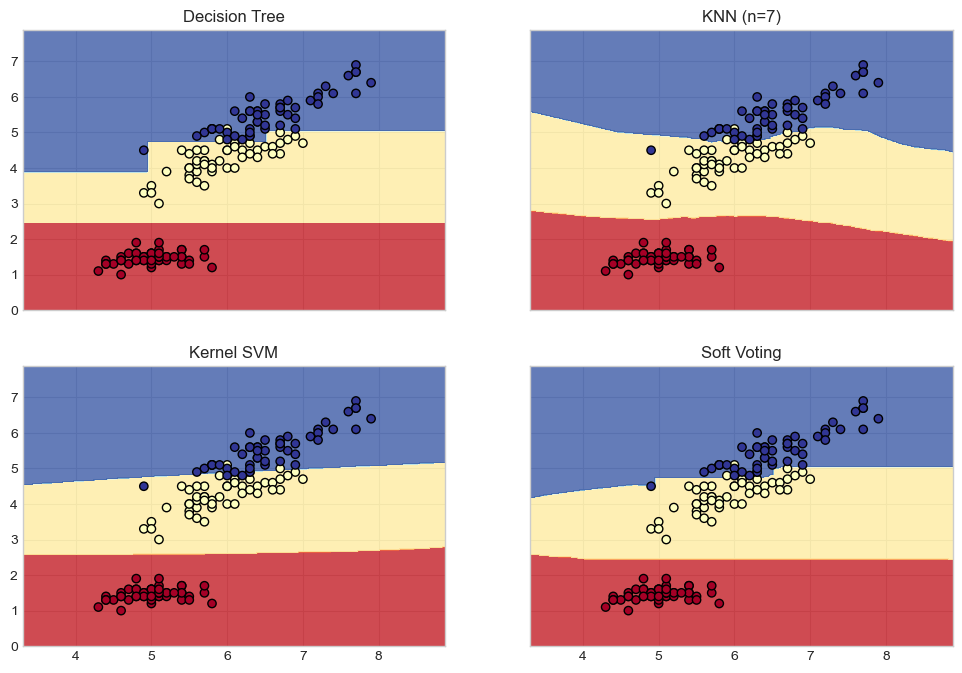

In [94]:
# figure 생성
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(12, 8))

for idx, model, title in zip(product([0, 1], [0, 1]),
                             [model1, model2, model3, vote_soft_model],
                             ["Decision Tree", "KNN (n=7)", "Kernel SVM", "Soft Voting"]):
    # 모델 학습
    model.fit(X, y)
    
    # 영역 구분 데이터 생성
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 각 클래스의 영역을 구분
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # 산점도로 시각화
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors="k")

    # 모델 이름 생성
    axarr[idx[0], idx[1]].set_title(title)

plt.show()

### 회귀 - Regressor

#### 보스턴 주택 가격

In [124]:
# 모델들
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(estimators=[("linear", model1), ("gbr", model2), ("forest", model3)])

- 교차검증 수행

In [125]:
for model in (model1, model2, model3, vote_model):
    model_title = str(type(model)).split(".")[-1][:-2]
    score = cross_val_score(estimator=model,
                            X=boston_data, y=boston_target,
                            cv=5,
                            scoring="r2",
                            n_jobs=multiprocessing.cpu_count())
    print("R2: %.2f (+/- %.2f) [%s]" % (score.mean(), score.std(), model_title))

R2: 0.35 (+/- 0.38) [LinearRegression]
R2: 0.68 (+/- 0.16) [GradientBoostingRegressor]
R2: 0.62 (+/- 0.22) [RandomForestRegressor]
R2: 0.66 (+/- 0.20) [VotingRegressor]


#### 당뇨병 데이터

In [126]:
# 모델들
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(estimators=[("linear", model1), ("gbr", model2), ("forest", model3)])

- 교차검증 수행

In [127]:
for model in (model1, model2, model3, vote_model):
    model_title = str(type(model)).split(".")[-1][:-2]
    score = cross_val_score(estimator=model,
                            X=diabetes.data, y=diabetes.target,
                            cv=5,
                            n_jobs=multiprocessing.cpu_count())
    print("R2: %.2f (+/- %.2f) [%s]" % (score.mean(), score.std(), model_title))

R2: 0.48 (+/- 0.05) [LinearRegression]
R2: 0.41 (+/- 0.07) [GradientBoostingRegressor]
R2: 0.42 (+/- 0.05) [RandomForestRegressor]
R2: 0.47 (+/- 0.05) [VotingRegressor]


##### 회귀식 시각화

In [128]:
# 데이터
X = boston_data[:, 0].reshape(-1, 1)
y = boston_target
X_test = np.array(np.arange(X.min()-1, X.max(), 0.5)).reshape(-1, 1)

# 모델들
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(estimators=[("linear", model1), ("knn", model2), ("svc", model3)])

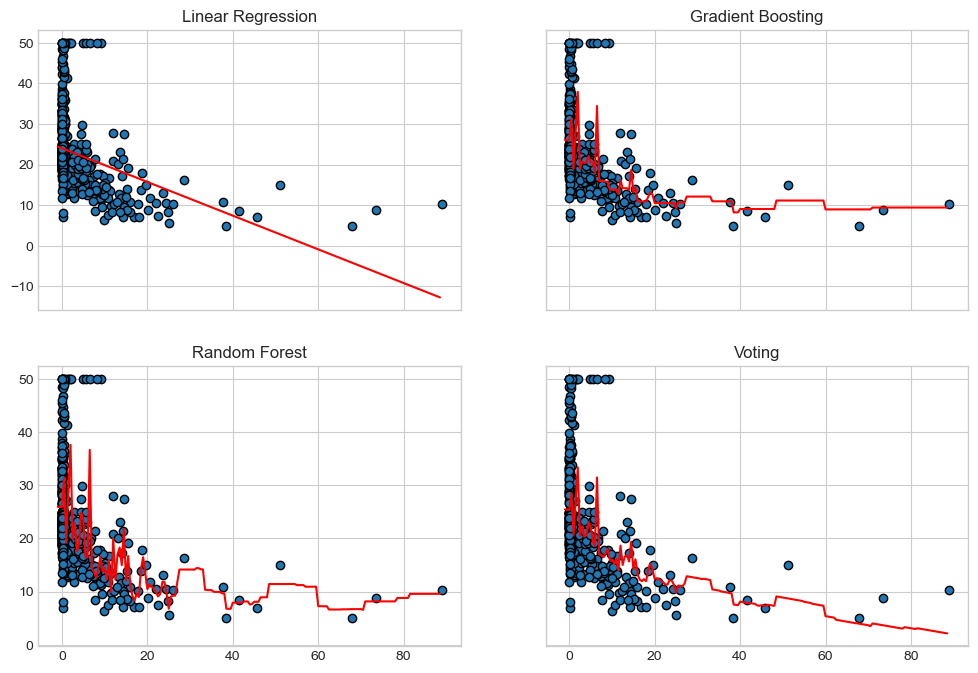

In [129]:
# figure 생성
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(12, 8))

for idx, model, title in zip(product([0, 1], [0, 1]),
                             [model1, model2, model3, vote_model],
                             ["Linear Regression", "Gradient Boosting", "Random Forest", "Voting"]):
    # 모델 학습 및 예측 데이터 생성
    model.fit(X, y)
    y_predict = model.predict(X_test)

    # 실제 주택 가격
    axarr[idx[0], idx[1]].scatter(X, y, edgecolors="k")

    # 예측 주택 가격
    axarr[idx[0], idx[1]].plot(X_test, y_predict, color="r")

    # 모델 이름 생성
    axarr[idx[0], idx[1]].set_title(title)

plt.show()

## Stack Generalization(스택 일반화)
- 각 모델의 예측값을 최종 모델의 입력으로 사용
- 모델의 편향을 줄이는 데 효과적

### 분류 - Classifier

#### 붓꽃 데이터

In [103]:
# 붓꽃 데이터 불러오기
iris = load_iris()

# 모델들
estimators = [("logistic", LogisticRegression(max_iter=10000)),
              ("svc", SVC()),
              ("naive", GaussianNB())]

# StackingClassifier
stack_model = StackingClassifier(estimators=estimators,
                                 final_estimator=RandomForestClassifier())

- 교차검증 수행

In [104]:
# 교차검증 수행
score = cross_validate(estimator=stack_model,
                       X=iris.data, y=iris.target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.14394674301147461 (+/- 0.0022915683785731033)
avg score time: 0.0055596351623535155 (+/- 0.00022171801876888606)
avg test score: 0.9666666666666666 (+/- 0.02108185106778919)


##### 결정경계 시각화

In [107]:
# 데이터
X = iris.data[:, [0, 2]]
y = iris.target

# 모델들
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack_model = StackingClassifier(estimators=estimators,
                                 final_estimator=RandomForestClassifier())

# 각 클래스를 구분해줄 데이터 생성
xx, yy = get_meshgrid(X[:, 0], X[:, 1], 0.02)

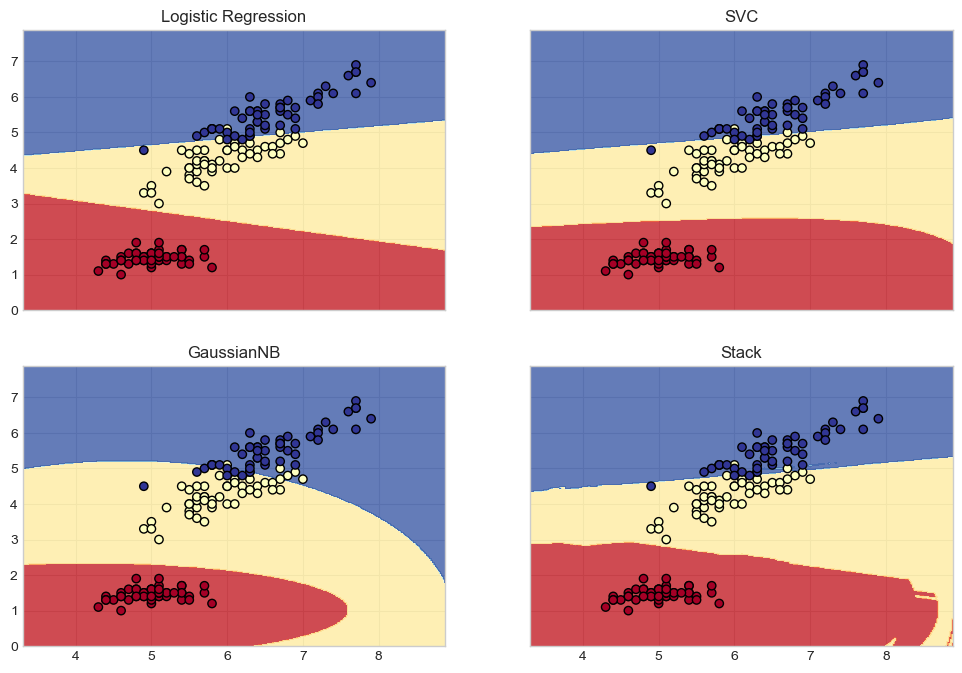

In [108]:
# figure 생성
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(12, 8))

for idx, model, title in zip(product([0, 1], [0, 1]),
                             [model1, model2, model3, stack_model],
                             ["Logistic Regression", "SVC", "GaussianNB", "Stack"]):
    # 모델 학습
    model.fit(X, y)
    
    # 영역 구분 데이터 생성
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 각 클래스의 영역을 구분
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # 산점도로 시각화
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors="k")

    # 모델 이름 생성
    axarr[idx[0], idx[1]].set_title(title)

plt.show()

### 회귀 - Regressor

#### 보스턴 주택 가격

In [116]:
# 모델들
estimators = [("ridge", Ridge()),
              ("lasso", Lasso()),
              ("svr", SVR())]

# StackingClassifier
stack_model = make_pipeline(StandardScaler(),
                            StackingRegressor(estimators=estimators, final_estimator=GradientBoostingRegressor()))

- 교차검증 수행

In [117]:
# 교차검증 수행
score = cross_validate(estimator=stack_model,
                       X=boston_data, y=boston_target,
                       cv=5,
                       n_jobs=multiprocessing.cpu_count())

# 교차검증 결과
print("avg fit time: {} (+/- {})".format(score["fit_time"].mean(), score["fit_time"].std()))
print("avg score time: {} (+/- {})".format(score["score_time"].mean(), score["score_time"].std()))
print("avg test score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

avg fit time: 0.10085177421569824 (+/- 0.0050418900601950515)
avg score time: 0.004909515380859375 (+/- 0.0006438765712538393)
avg test score: 0.32092494149468875 (+/- 0.340246707302689)


##### 회귀식 시각화

In [118]:
# 데이터
X = boston_data[:, 0].reshape(-1, 1)
y = boston_target
X_test = np.array(np.arange(X.min()-1, X.max(), 0.5)).reshape(-1, 1)

# 모델들
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
stack_model = make_pipeline(StandardScaler(),
                            StackingRegressor(estimators=estimators, final_estimator=GradientBoostingRegressor()))

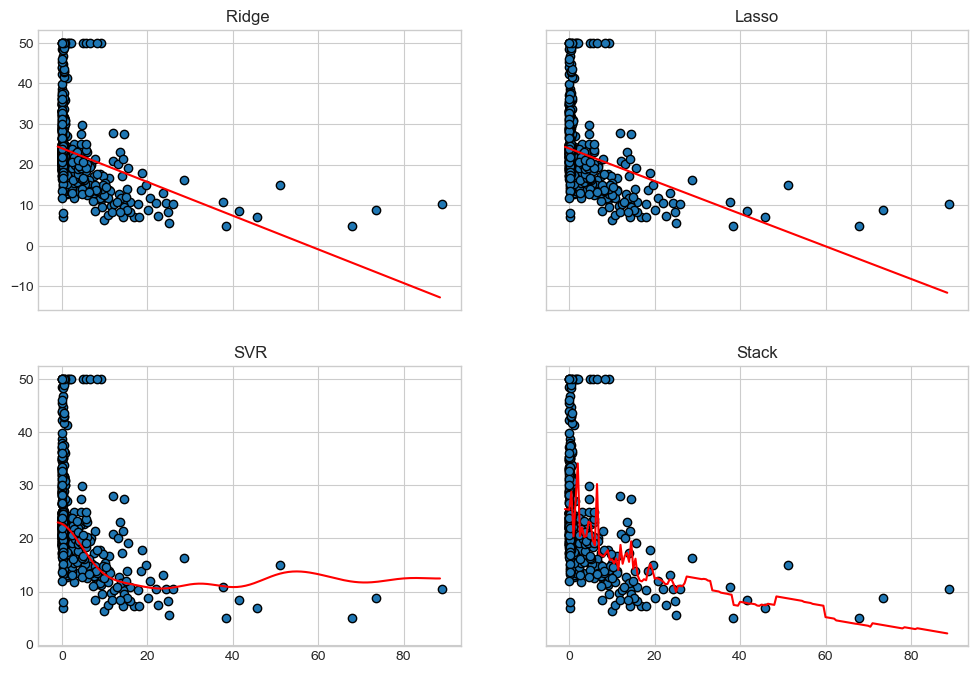

In [122]:
# figure 생성
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(12, 8))

for idx, model, title in zip(product([0, 1], [0, 1]),
                             [model1, model2, model3, vote_model],
                             ["Ridge ", "Lasso", "SVR", "Stack"]):
    # 모델 학습 및 예측 데이터 생성
    model.fit(X, y)
    y_predict = model.predict(X_test)

    # 실제 주택 가격
    axarr[idx[0], idx[1]].scatter(X, y, edgecolors="k")

    # 예측 주택 가격
    axarr[idx[0], idx[1]].plot(X_test, y_predict, color="r")

    # 모델 이름 생성
    axarr[idx[0], idx[1]].set_title(title)

plt.show()